In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
ex0 = pd.read_table('ex0.txt',header=None)
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [25]:
def get_mat(df):
    # 特征矩阵
    xMat = np.mat(df.iloc[:,:-1])
    # 值矩阵(转换成 列向量)
    yMat = np.mat(df.iloc[:,-1]).T
    return xMat,yMat

In [26]:
def plot_df(df):
    xMat,yMat = get_mat(df)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=3)
    plt.show()

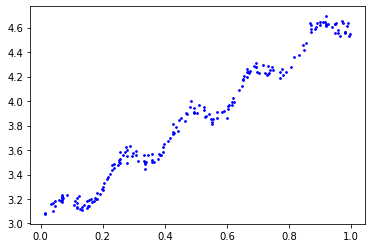

In [27]:
plot_df(ex0)

In [28]:
def stand_regression(df):
    xMat,yMat = get_mat(df)
    xTx = xMat.T * xMat
    # 判断是否为奇异矩阵
    if np.linalg.det(xTx) == 0:
        print("奇异矩阵，无法求逆")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [29]:
stand_regression(ex0)

matrix([[3.00774324],
        [1.69532264]])

In [30]:
'''
函数功能：
    绘制数据集
    绘制线性回归方程
'''
def plotReg(df):
    xMat,yMat = get_mat(df)
    # 绘制数据集
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=3)
    # 求解 线性回归方程
    ws = stand_regression(df)
    yHat = xMat * ws
    # 绘制 线性回归方程
    plt.plot(xMat[:,1],yHat,c='r')
    plt.show()

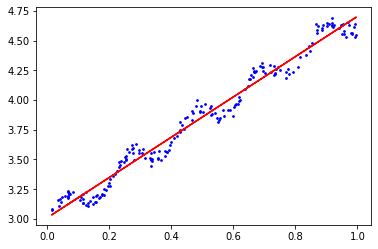

In [31]:
plotReg(ex0)

### 局部加权线性回归算法

In [37]:
def lwlr(testMat,xMat,yMat,k=1.0):
    # 测试矩阵的 行数
    n = testMat.shape[0]
    # 输入矩阵的 行数
    m = xMat.shape[0]

    # 初始化 Weight
    W = np.mat(np.eye(m))
    yHat = np.zeros(n)

    for i in range(n):
        for j in range(m):
            diffMat = testMat[i] - xMat[j]
            W[j,j] = np.exp(diffMat*diffMat.T/(-2*k**2))
        xTx = xMat.T*(W*xMat)
        if np.linalg.det(xTx) == 0:
            print("奇异矩阵，无法求逆矩")
            return
        ws = xTx.I * (xMat.T*(W*yMat))
        yHat[i] = testMat[i] * ws
    return ws,yHat

In [38]:
def plot_lwlr(df,k=1.0):
    xMat,yMat = get_mat(df)
    # 升序排列，argsort：对数据进行从小到大的排列
    strInd = xMat[:,1].argsort(0)
    xSort = xMat[strInd][:,0]

    #lwlr
    _,yHat = lwlr(xMat,xMat,yMat,k)

    fig = plt.figure(figsize=(10,8),dpi=100)

    # 添加一个绘图区作为主图的一部分(画辅助线的)
    fig1 = fig.add_subplot(111)
    # 绘制数据集
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    # 绘制 回归曲线
    plt.plot(xSort[:,1],yHat[strInd],linewidth=1,c='r')
    

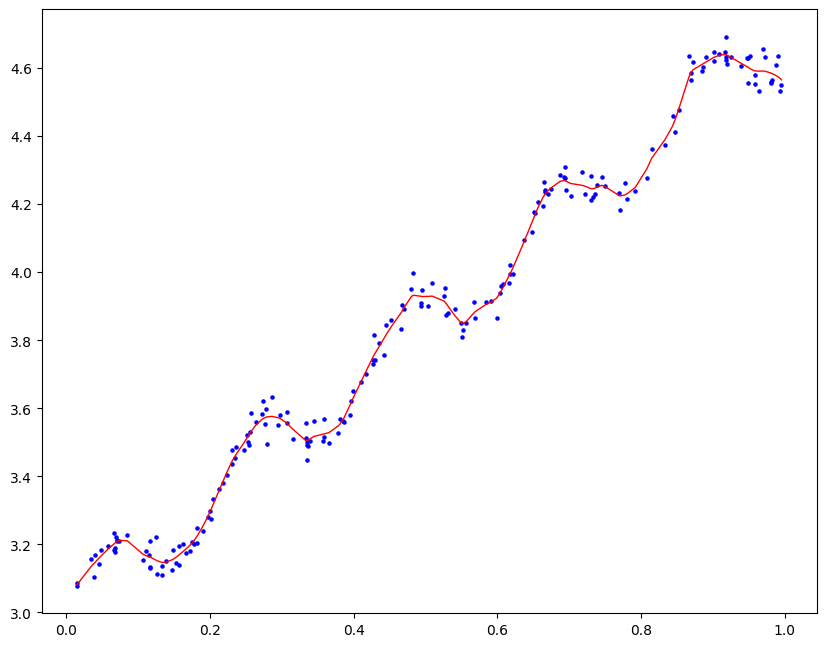

In [39]:
plot_lwlr(ex0,.01)